In [6]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/datasets/spscientist/students-performance-in-exams/StudentsPerformance.csv
/kaggle/input/datasets/organizations/uciml/autompg-dataset/auto-mpg.csv


PRADEEP MANIKANDAN D 24BAD088

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder, PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score

In [8]:
df= pd.read_csv("/kaggle/input/datasets/spscientist/students-performance-in-exams/StudentsPerformance.csv")

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [10]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [11]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [12]:
df.isna().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [13]:
df['final_score'] = df[['math score', 'reading score', 'writing score']].mean(axis=1)

In [14]:
le = LabelEncoder()
df['parental level of education'] = le.fit_transform(df['parental level of education'])
df['test preparation course'] = le.fit_transform(df['test preparation course'])

In [15]:
X = df[['parental level of education', 'test preparation course', 'math score']] # Example subset
y = df['final_score']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [18]:
from sklearn.linear_model import Ridge, Lasso, LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)

lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

y_pred = lr_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.2f}")


MSE: 30.31
RMSE: 5.51
R² Score: 0.86


Text(0.5, 1.0, 'Predicted vs Actual')

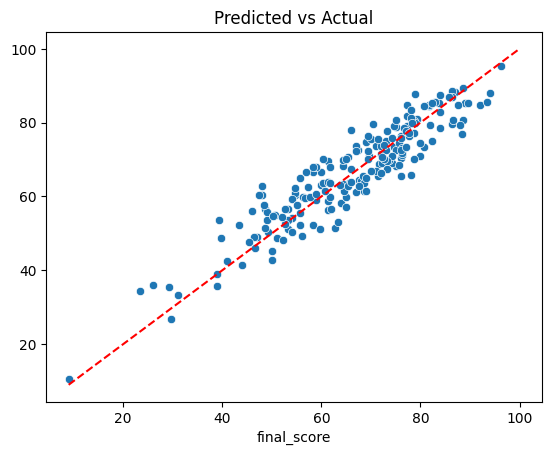

In [19]:
sns.scatterplot(x=y_test, y=y_pred)
plt.plot([y.min(), y.max()], [y.min(), y.max()], '--r')
plt.title('Predicted vs Actual')

Text(0.5, 1.0, 'Residual Distribution')

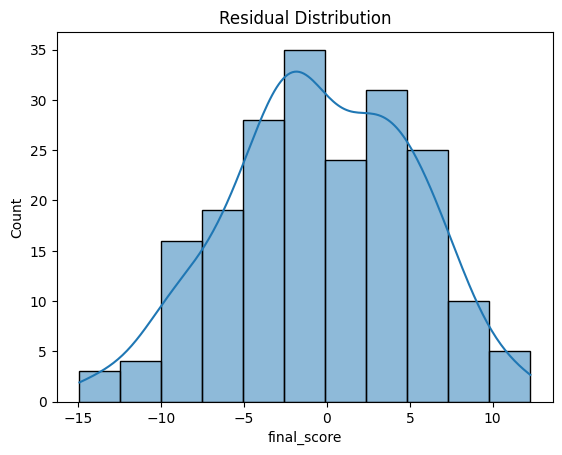

In [20]:
sns.histplot((y_test - y_pred), kde=True)
plt.title('Residual Distribution')

Text(0.5, 1.0, 'Feature Influence')

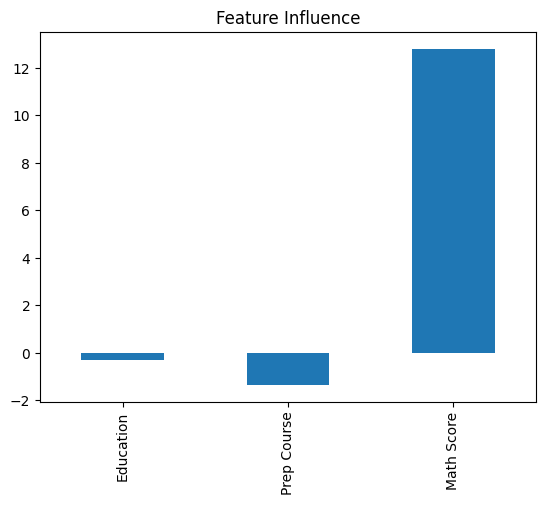

In [21]:
coef_series = pd.Series(lr_model.coef_, index=['Education', 'Prep Course', 'Math Score'])
coef_series.plot(kind='bar')
plt.title('Feature Influence')

SCENARIO 2

In [23]:
df1=pd.read_csv("/kaggle/input/datasets/organizations/uciml/autompg-dataset/auto-mpg.csv")

In [24]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [25]:
df1.describe()


,mpg,cylinders,displacement,weight,acceleration,model year,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


In [26]:
df1.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [27]:
df1.isna().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64

In [52]:
X = df1[['horsepower']].values
y = df1['mpg'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Degree 2
MSE: 18.42
RMSE: 4.29
R2: 0.64

Degree 3
MSE: 18.46
RMSE: 4.3
R2: 0.64

Degree 4
MSE: 18.27
RMSE: 4.27
R2: 0.64



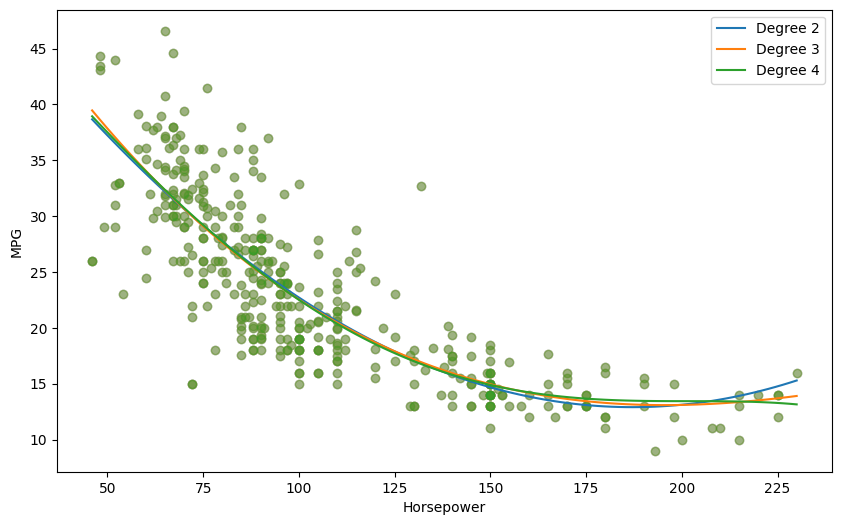

In [ ]:
degrees = [2, 3, 4]

train_errors = []
test_errors = []

plt.figure(figsize=(10,6))

for degree in degrees:
    poly = PolynomialFeatures(degree=degree)
    X_train_poly = poly.fit_transform(X_train_scaled)
    X_test_poly = poly.transform(X_test_scaled)

    model = LinearRegression()
    model.fit(X_train_poly, y_train)

    y_train_pred = model.predict(X_train_poly)
    y_test_pred = model.predict(X_test_poly)

    train_errors.append(mean_squared_error(y_train, y_train_pred))
    test_errors.append(mean_squared_error(y_test, y_test_pred))

    print("Degree", degree)
    print("MSE:", round(mean_squared_error(y_test, y_test_pred),2))
    print("RMSE:", round(np.sqrt(mean_squared_error(y_test, y_test_pred)),2))
    print("R2:", round(r2_score(y_test, y_test_pred),2))
    print()
    X_plot = np.linspace(X.min(), X.max(), 100).reshape(-1,1)
    X_plot_scaled = scaler.transform(X_plot)
    X_plot_poly = poly.transform(X_plot_scaled)
    y_plot = model.predict(X_plot_poly)
    plt.scatter(X, y, alpha=0.3)
    plt.plot(X_plot, y_plot, label="Degree " + str(degree))

plt.xlabel("Horsepower")
plt.ylabel("MPG")
plt.legend()
plt.show()


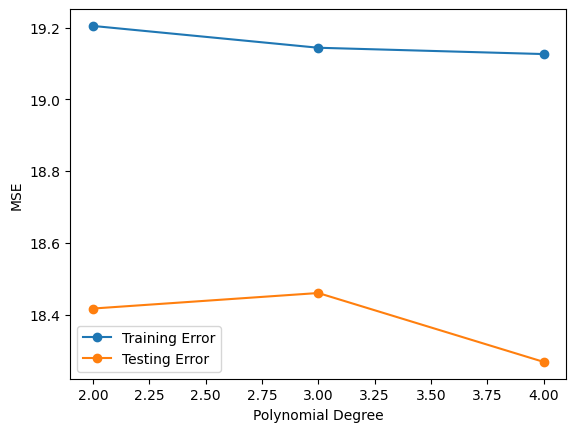

In [54]:
plt.figure()
plt.plot(degrees, train_errors, marker='o')
plt.plot(degrees, test_errors, marker='o')
plt.xlabel("Polynomial Degree")
plt.ylabel("MSE")
plt.legend(["Training Error", "Testing Error"])
plt.show()

In [55]:
poly = PolynomialFeatures(degree=4)

X_train_poly = poly.fit_transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)

ridge = Ridge(alpha=1.0)
ridge.fit(X_train_poly, y_train)

ridge_pred = ridge.predict(X_test_poly)

print("Ridge Degree 4")
print("MSE:", round(mean_squared_error(y_test, ridge_pred),2))
print("RMSE:", round(np.sqrt(mean_squared_error(y_test, ridge_pred)),2))
print("R2:", round(r2_score(y_test, ridge_pred),2))

Ridge Degree 4
MSE: 18.31
RMSE: 4.28
R2: 0.64
